In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob 
import os


In [ ]:
os.mkdir('/content/resized')
os.mkdir("/content/train_2")
os.mkdir('/content/train_2/class0')
os.mkdir('/content/train_2/class1')
os.mkdir("/content/val_2")
os.mkdir('/content/val_2/class0')
os.mkdir('/content/val_2/class1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -qq "/content/drive/MyDrive/train.zip"

In [ ]:
input_dir = '/content/train'  
output_dir = '/content/resized' 

for filename in os.listdir(input_dir):
    img_path = os.path.join(input_dir, filename)
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (256, 256))
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, resized_img)

print("Image resizing complete!")

Image resizing complete!


In [ ]:
for dirname, _, filenames in os.walk('/content/resized'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/resized/cat.10054.jpg
/content/resized/dog.6843.jpg
/content/resized/dog.4701.jpg
/content/resized/cat.2814.jpg
/content/resized/dog.11120.jpg
/content/resized/dog.9419.jpg
/content/resized/dog.4200.jpg
/content/resized/cat.3890.jpg
/content/resized/cat.9175.jpg
/content/resized/cat.3769.jpg
/content/resized/dog.4213.jpg
/content/resized/cat.6468.jpg
/content/resized/dog.7925.jpg
/content/resized/cat.7347.jpg
/content/resized/cat.9610.jpg
/content/resized/cat.10606.jpg
/content/resized/cat.71.jpg
/content/resized/cat.9347.jpg
/content/resized/dog.7942.jpg
/content/resized/cat.9897.jpg
/content/resized/cat.2370.jpg
/content/resized/dog.6378.jpg
/content/resized/dog.4198.jpg
/content/resized/dog.124.jpg
/content/resized/dog.10753.jpg
/content/resized/cat.85.jpg
/content/resized/cat.9646.jpg
/content/resized/dog.654.jpg
/content/resized/cat.7430.jpg
/content/resized/dog.10995.jpg
/content/resized/dog.9233.jpg
/content/resized/dog.7138.jpg
/cont

In [ ]:
# label 분류
cat = []
cat_label = []
dog = []
dog_label = []
filenames = glob('/content/resized/*.jpg')
labels = [1 if 'dog' in pic else 0 for pic in os.listdir('/content/resized/')]
for label in labels:
  if label == 0:
    cat_label.append(label)
  else:
    dog_label.append(label) 
# 사진 분류
file_list = os.listdir('/content/resized/')
for item in file_list:
  if item[:3] == 'dog':
    dog.append(item)
  else:
    cat.append(item) 
dog = dog[0:10000]
dog_label = dog_label[0:10000]
cat = cat[0:10000]
cat_label = cat_label[0:10000]
print(len(dog),len(dog_label), len(cat), len(cat_label) )

10000 10000 10000 10000


In [ ]:
dog_train = dog[0:8000]
dog_val = dog[8000:]
cat_train = cat[0:8000]
cat_val = cat[8000:]
dog_train_label = dog_label[0:8000]
dog_val_label = dog_label[8000:]
cat_train_label = cat_label[0:8000]
cat_val_label = cat_label[8000:]
X_train = dog_train + cat_train
y_train = dog_train_label + cat_train_label
X_test = dog_val + cat_val 
y_test = dog_val_label + cat_val_label
print(len(X_train), len(X_test), len(y_train), len(y_test))

16000 4000 16000 4000


In [ ]:
import os
import shutil

# Define the source directory where the files are currently located
source_dir = '/content/resized'

# Define the destination directory where the files will be moved
destination_dir = '/content/train_2'

# Define the list of file names to be moved  # Replace with your list of file names

# Loop through each file name in the list and move it to the destination directory
for file_name in X_train:
    # Construct the source and destination file paths
    source_file_path = os.path.join(source_dir, file_name)
    destination_file_path = os.path.join(destination_dir, file_name)
    
    # Move the file to the destination directory
    shutil.move(source_file_path, destination_file_path)
    
    print(f'Successfully moved {file_name} to {destination_dir}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Successfully moved cat.4971.jpg to /content/train_2
Successfully moved cat.3236.jpg to /content/train_2
Successfully moved cat.6617.jpg to /content/train_2
Successfully moved cat.1606.jpg to /content/train_2
Successfully moved cat.7583.jpg to /content/train_2
Successfully moved cat.6918.jpg to /content/train_2
Successfully moved cat.11122.jpg to /content/train_2
Successfully moved cat.2333.jpg to /content/train_2
Successfully moved cat.4527.jpg to /content/train_2
Successfully moved cat.10376.jpg to /content/train_2
Successfully moved cat.616.jpg to /content/train_2
Successfully moved cat.1047.jpg to /content/train_2
Successfully moved cat.4128.jpg to /content/train_2
Successfully moved cat.8244.jpg to /content/train_2
Successfully moved cat.11882.jpg to /content/train_2
Successfully moved cat.7224.jpg to /content/train_2
Successfully moved cat.9265.jpg to /content/train_2
Successfully moved cat.9135.jpg to /content/train_2
Successfully moved cat.161

In [ ]:
import os
import shutil
source_dir = '/content/resized'
destination_dir = '/content/val_2'
for file_name in X_test:
    source_file_path = os.path.join(source_dir, file_name)
    destination_file_path = os.path.join(destination_dir, file_name)
    shutil.move(source_file_path, destination_file_path)
    print(f'Successfully moved {file_name} to {destination_dir}')

Successfully moved dog.8433.jpg to /content/val_2
Successfully moved dog.4391.jpg to /content/val_2
Successfully moved dog.4859.jpg to /content/val_2
Successfully moved dog.1694.jpg to /content/val_2
Successfully moved dog.478.jpg to /content/val_2
Successfully moved dog.10747.jpg to /content/val_2
Successfully moved dog.12048.jpg to /content/val_2
Successfully moved dog.12434.jpg to /content/val_2
Successfully moved dog.3957.jpg to /content/val_2
Successfully moved dog.5135.jpg to /content/val_2
Successfully moved dog.2436.jpg to /content/val_2
Successfully moved dog.6390.jpg to /content/val_2
Successfully moved dog.10653.jpg to /content/val_2
Successfully moved dog.12183.jpg to /content/val_2
Successfully moved dog.2390.jpg to /content/val_2
Successfully moved dog.11700.jpg to /content/val_2
Successfully moved dog.1155.jpg to /content/val_2
Successfully moved dog.2138.jpg to /content/val_2
Successfully moved dog.4513.jpg to /content/val_2
Successfully moved dog.6858.jpg to /content/v

In [ ]:
import os
import shutil
source_dir = '/content/train_2'
destination_dir = '/content/train_2/class0'
for file_name in cat_train:
    source_file_path = os.path.join(source_dir, file_name)
    destination_file_path = os.path.join(destination_dir, file_name)
    shutil.move(source_file_path, destination_file_path)
print(f'Successfully moved {file_name} to {destination_dir}')
 
destination_dir = '/content/train_2/class1'
for file_name in dog_train:
    source_file_path = os.path.join(source_dir, file_name)
    destination_file_path = os.path.join(destination_dir, file_name)
    shutil.move(source_file_path, destination_file_path)

print(f'Successfully moved {file_name} to {destination_dir}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Successfully moved dog.7338.jpg to /content/train_2/class1
Successfully moved dog.9984.jpg to /content/train_2/class1
Successfully moved dog.9064.jpg to /content/train_2/class1
Successfully moved dog.5249.jpg to /content/train_2/class1
Successfully moved dog.4384.jpg to /content/train_2/class1
Successfully moved dog.3257.jpg to /content/train_2/class1
Successfully moved dog.3165.jpg to /content/train_2/class1
Successfully moved dog.12456.jpg to /content/train_2/class1
Successfully moved dog.4295.jpg to /content/train_2/class1
Successfully moved dog.6033.jpg to /content/train_2/class1
Successfully moved dog.1546.jpg to /content/train_2/class1
Successfully moved dog.11350.jpg to /content/train_2/class1
Successfully moved dog.4154.jpg to /content/train_2/class1
Successfully moved dog.10173.jpg to /content/train_2/class1
Successfully moved dog.3715.jpg to /content/train_2/class1
Successfully moved dog.4478.jpg to /content/train_2/class1
Successfully move

In [ ]:
import os
import shutil

source_dir = '/content/val_2'
destination_dir = '/content/val_2/class0'

for file_name in cat_val:
    source_file_path = os.path.join(source_dir, file_name)
    destination_file_path = os.path.join(destination_dir, file_name)
    shutil.move(source_file_path, destination_file_path)
print(f'Successfully moved {file_name} to {destination_dir}')

destination_dir = '/content/train_2/class1'
for file_name in dog_val:
    source_file_path = os.path.join(source_dir, file_name)
    destination_file_path = os.path.join(destination_dir, file_name)
    shutil.move(source_file_path, destination_file_path)   
print(f'Successfully moved {file_name} to {destination_dir}')

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(256, 256, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 196608)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               25165952  
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 25,174,273
Trainable params: 25,174,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
image_size = (256, 256)
train_dir = '/content/train_2/'
val_dir = '/content/val_2'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(256, 256),
        batch_size=20,
        class_mode='binary')

Found 18000 images belonging to 2 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10


<ipython-input-32-2a8a52b21563>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


900/900 [==============================] - 55s 55ms/step - loss: 2.0772 - accuracy: 0.5436 - val_loss: 0.9680 - val_accuracy: 0.2540
Epoch 2/10
900/900 [==============================] - 48s 53ms/step - loss: 0.6906 - accuracy: 0.5802 - val_loss: 0.6398 - val_accuracy: 0.6470
Epoch 3/10
900/900 [==============================] - 50s 55ms/step - loss: 0.6866 - accuracy: 0.5570 - val_loss: 0.7905 - val_accuracy: 5.0000e-04
Epoch 4/10
900/900 [==============================] - 50s 56ms/step - loss: 0.6862 - accuracy: 0.5564 - val_loss: 0.7973 - val_accuracy: 0.0000e+00
Epoch 5/10
900/900 [==============================] - 49s 55ms/step - loss: 0.6871 - accuracy: 0.5556 - val_loss: 0.8103 - val_accuracy: 0.0000e+00
Epoch 6/10
900/900 [==============================] - 50s 56ms/step - loss: 0.6871 - accuracy: 0.5556 - val_loss: 0.7995 - val_accuracy: 0.0000e+00
Epoch 7/10
900/900 [==============================] - 50s 55ms/step - loss: 0.6871 - accuracy: 0.5556 - val_loss: 0.8037 - val_accu

In [ ]:
input_dir = '/content/drive/MyDrive/test_21/class0' 
output_dir = '/content/drive/MyDrive/test_21/class0'  
for filename in os.listdir(input_dir):
    img_path = os.path.join(input_dir, filename)
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (256, 256))
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, resized_img)

print("Image resizing complete!")

input_dir = '/content/drive/MyDrive/test_21/class1'  
output_dir = '/content/drive/MyDrive/test_21/class1' 
for filename in os.listdir(input_dir):
    img_path = os.path.join(input_dir, filename)
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (256, 256))


    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, resized_img)
print("Image resizing complete!")

Image resizing complete!
Image resizing complete!


In [ ]:
test_dir = '/content/drive/MyDrive/test_21'
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=20,
    class_mode='binary')

Found 100 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)     

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
  1/900 [..............................] - ETA: 1:13 - loss: 0.7760 - accuracy: 0.4000

<ipython-input-57-894317362b9f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


900/900 [==============================] - 49s 54ms/step - loss: 0.5519 - accuracy: 0.7179 - val_loss: 0.6326 - val_accuracy: 0.6215
Epoch 2/10
900/900 [==============================] - 49s 55ms/step - loss: 0.4294 - accuracy: 0.8057 - val_loss: 0.4218 - val_accuracy: 0.8145
Epoch 3/10
900/900 [==============================] - 49s 55ms/step - loss: 0.3156 - accuracy: 0.8622 - val_loss: 0.4439 - val_accuracy: 0.7830
Epoch 4/10
900/900 [==============================] - 50s 55ms/step - loss: 0.1647 - accuracy: 0.9363 - val_loss: 0.6906 - val_accuracy: 0.7735
Epoch 5/10
900/900 [==============================] - 49s 54ms/step - loss: 0.0692 - accuracy: 0.9759 - val_loss: 1.0848 - val_accuracy: 0.7395
Epoch 6/10
900/900 [==============================] - 49s 55ms/step - loss: 0.0436 - accuracy: 0.9857 - val_loss: 0.9370 - val_accuracy: 0.7800
Epoch 7/10
900/900 [==============================] - 50s 55ms/step - loss: 0.0322 - accuracy: 0.9906 - val_loss: 1.2331 - val_accuracy: 0.7595
Epo



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


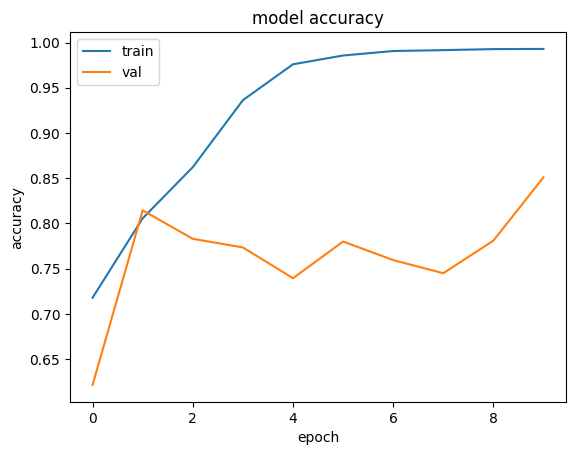

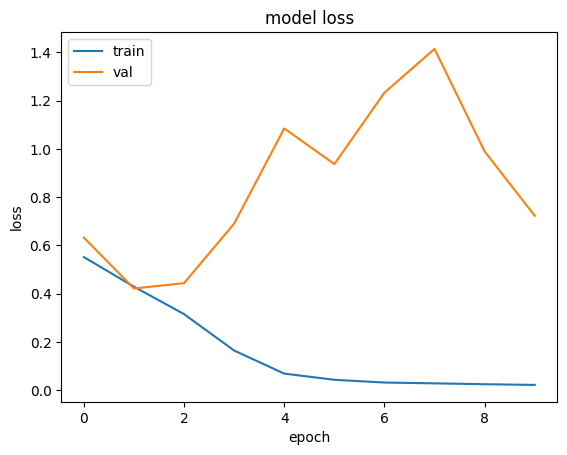

In [ ]:
print("\n")
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate_generator(test_generator)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

<ipython-input-69-03d4dd408d93>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator)


Test loss: 1.3031562566757202
Test accuracy: 0.7400000095367432


<ipython-input-69-03d4dd408d93>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


a) 위 코드 참고 바람

b) 파일명을 가지고 dog와 cat을 나누고 리스트 슬랙싱 기능을 이용하여 train, val set으로 나눈다.

c) image가 작으면 overfitting 가능성이 있어 사이즈에 대해 고민했다. 보통 128 또는 256 사이즈를 많이 사용한다. 사이즈가 클 수록 시간이 많이 걸려 둘 사이에서 고민했지만, 128을 했을 때 생각보다 시간이 안 걸려서 256을 선택했다.

d) 파라미터 수는 summary() 함수를 이용하여 나타냈다. 각 각 25,174,273, 29,617,729 해당했다.

CNN의 특징은 shape를 input 값을 처음에 확 줄이고, 합성곱을 할 때 마다 크기를 키워나갔다. 

e) 위 그래프 참고, epoch 당 accuracy와 loss를 설정했다. 

f) MLP는 성능을 판단할 수 없을 정도로 처참한 결과를 보였다. 그래프를 그리기에도 아까운 성능이었다.
이와 반대로, CNN은 성능이 띄어났다. 
3차원 데이터 형상을 유지하고 학습을 하니 더 좋은 결과를 볼 수 있었던 것 같다. 

g) CNN test 성능은 0.74%를 기록했다. 
